# CacheSim Data Analysis<a class="tocSkip">

## Import Statements<a class="tocSkip">

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.scale
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

%matplotlib inline
plt.style.use('default')
#plt.style.use('bmh')

large_file = "../data/largest_file_ever.csv"
blocksize = 64

## Useful Functions<a class="tocSkip">

In [4]:
def addlabels(x,y, x_offset = 0, y_offset = 0):
    '''
    Adds labels to a barplot above each piece of data.
    
    Parameters
    ----------
    x:
        Array of x values to place the labels at.
    y:
        Array of y values to place the labels at. This usually consists of the counts
        for data.
    x_offset:
        How much to offset the labels on the x axis.
    y_offset:
        How much to offset the labels on the y axis.
        
    Returns
    -------
    None
    '''
    
    for i in range(len(x)):
        plt.text(i + x_offset, y[i] + y_offset, y[i], ha = 'center')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Description-of-Test" data-toc-modified-id="Description-of-Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Description of Test</a></span><ul class="toc-item"><li><span><a href="#Cache-Type" data-toc-modified-id="Cache-Type-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cache Type</a></span></li><li><span><a href="#Replacement-Type" data-toc-modified-id="Replacement-Type-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Replacement Type</a></span></li><li><span><a href="#Cache-Size" data-toc-modified-id="Cache-Size-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Cache Size</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Cache-Type" data-toc-modified-id="Cache-Type-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cache Type</a></span><ul class="toc-item"><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li><li><span><a href="#Replacement-Type" data-toc-modified-id="Replacement-Type-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Replacement Type</a></span><ul class="toc-item"><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li><li><span><a href="#Cache-Size" data-toc-modified-id="Cache-Size-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cache Size</a></span><ul class="toc-item"><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li><li><span><a href="#All-Features" data-toc-modified-id="All-Features-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>All Features</a></span><ul class="toc-item"><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Appendix-A" data-toc-modified-id="Appendix-A-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix A</a></span></li><li><span><a href="#Appendix-B" data-toc-modified-id="Appendix-B-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendix B</a></span></li></ul></div>

# Introduction

&emsp;Computer cache memory is a very important part of computer architecture. Caches are used to decrease the processing time of a computer by storing copies of needed data closer to the processor in static random access memory (SRAM). While reading from a cache is faster than reading from the regular computer memory that we use, caches are typically very small. This limitation comes from SRAM being prohibitively expensive to make in large quanitites. Because of this, computer scientists and engineers design caches that are highly efficient to make the most out of small cache sizes.

&emsp;CacheSim is a program written to simulate caches with different associatitivites, block sizes, cache sizes, and replacement strategies. To save time, I wrote a decently robust CLI interface that allows one to set different cache sizes, block sizes, associativities, memory sizes, replacement strategies, and more. These variables are simulated one at a time in different combinations created from these program arguments. CacheSim also comes with debug commands and line by line view to see what is going on in each simulation. 

&emsp;This report will examine the effect of changing cache types (associativity), replacement types, and cache sizes in different scenarios. All caches will also use the same trace file (gcc.trace) in their simulations. This report has been written in a jupyter notebook with a table of contents add-on. Please use the table of contents feature in your PDF viewer to navigate through the discussion sections to avoid looking at bad code.

# Description of Test

The best way to describe the test executed is to list out the command used for its execution. Please see [Appendix A](#Appendix-A) for a description of the arguments and [Appendix B](#Appendix-B) for a full table of the dataset.

```CacheSim -sf=gcc -s -rp=lru,fifo -e=largest_file_ever.csv -bs=64 -cs=64,128,256,512,1024,2048,4096,8192,16384,32768,65536,131072,262144,524288,1048576,2097152,4194304,8388608 -as=1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768,65536,131072,262144,524288,1048576,2097152,4194304,8388608```

&emsp;This test uses varying cache sizes and associativities with a constant block size of $2^{6}$ bytes (64 bytes) with lru and fifo replacement strategies. This allows testing of all three types of caches with a variety of cache sizes. These settings yield usable data since the program uses the following equations as a check for valid parameters:

$
\begin{equation}
\text{Number of Lines} = \frac{\text{Cache Size}}{\text{Block Size}}\tag{1}\label{lines}
\end{equation}
$

$
\begin{equation}
\text{Number of Sets} = \frac{\text{Number of Lines}}{\text{Associativity}}\tag{2}\label{sets}
\end{equation}
$

&emsp;From $\eqref{sets}$ it can be determined that the cache size has to be greater than or equal to the block size, and from $\eqref{lines}$ it can be gathered that the cache size has to be greater than or equal to the greatest associativity times the block size. If a set of parameters violates these rules, the simulator skips them and moves onto the next set.

## Cache Type

&emsp;Cache type takes the results of the test and plots hit rate against cache size for different associativities. The LRU data category is used since replacement strategy could be held constant. In the initial plot, the relationship of associativity and hit rate was not noticeable, so cache sizes were limited to a range from $2^{12}$ to $2^{19}$.

## Replacement Type

&emsp;Replacement type separates the results into LRU and FIFO sets and isolates all rows with a common associativity. This associativity was chosen to be 4 since it allowed for a comparison of LRU and FIFO replacement for a variety of cache sizes.

## Cache Size

Since we have a variety of cache sizes available in the dataset, it would be difficult to plot all of them and maintain a usable graph. I isolated cache sizes between $2^{8}$ and $2^{13}$ bytes and graphed each size's associativities and hit rates in bar plots. This arrangement allows one to see the impact of cache size on hit rate by noticing what it does to different associativities across cache sizes.

# Results

## Cache Type

### Data Analysis

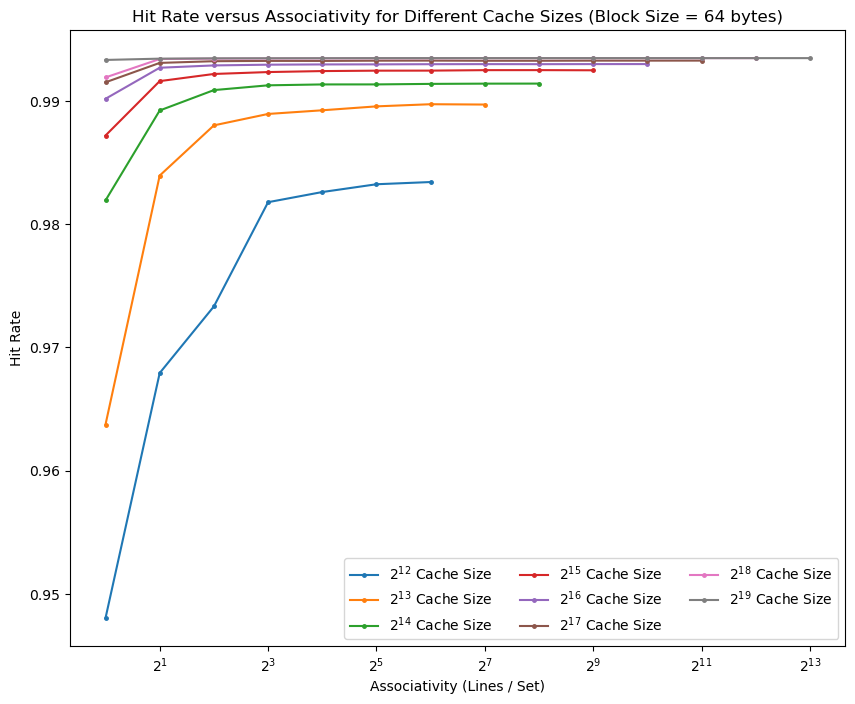

In [82]:
%matplotlib inline
plt.rc('font', size=10) #controls default text size
large_df = pd.read_csv(large_file)

#Find the rows that adhere to the block size and cache size that we want.
values = large_df.loc[large_df['block_size'] == blocksize].loc[large_df['lru_fifo']=='lru']

fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot();
asbit = 20

for i in range(12, asbit):
    ax.plot(list(values.loc[values['cache_size'] == 2**i]['associativity']), 
            list(values.loc[values['cache_size'] == 2**i]['hit_rate']), label=f'$2^{{{i}}}$ Cache Size',
           marker='o', markersize=2.5)
    
ax.set_xscale('log', base=2)
ax.legend(ncol=3);
ax.set_xlabel('Associativity (Lines / Set)')
ax.set_ylabel('Hit Rate')
ax.set_title('Hit Rate versus Associativity for Different Cache Sizes (Block Size = ' + f'{blocksize} bytes)');

### Discussion

&emsp;The graph shows a number of interesting relationships between the associativity and the hit rate. At a general level, all of the curves are part of a logistic growth curve which means that hit rate increases with associativity regardless of the cache size chosen until it reaches an asymptotic value representing a maximum possible hit rate for that cache size. What is interesting is that the rate at which the hit rate increases with increasing associativity changes with cache size. Lower cache sizes generally have a higher rate of change in their initial associativities.

&emsp; The shape of the $2^{12}$ byte cache size curve is interesting since it has a dip at an associativity of 4. This gives the curve it a slightly different shape than the other curves in the graph. It is not clear if the difference is natural or if it indicates an error in the CacheSim program.

## Replacement Type

### Data Analysis

Text(0, 0.5, 'Hit Rate')

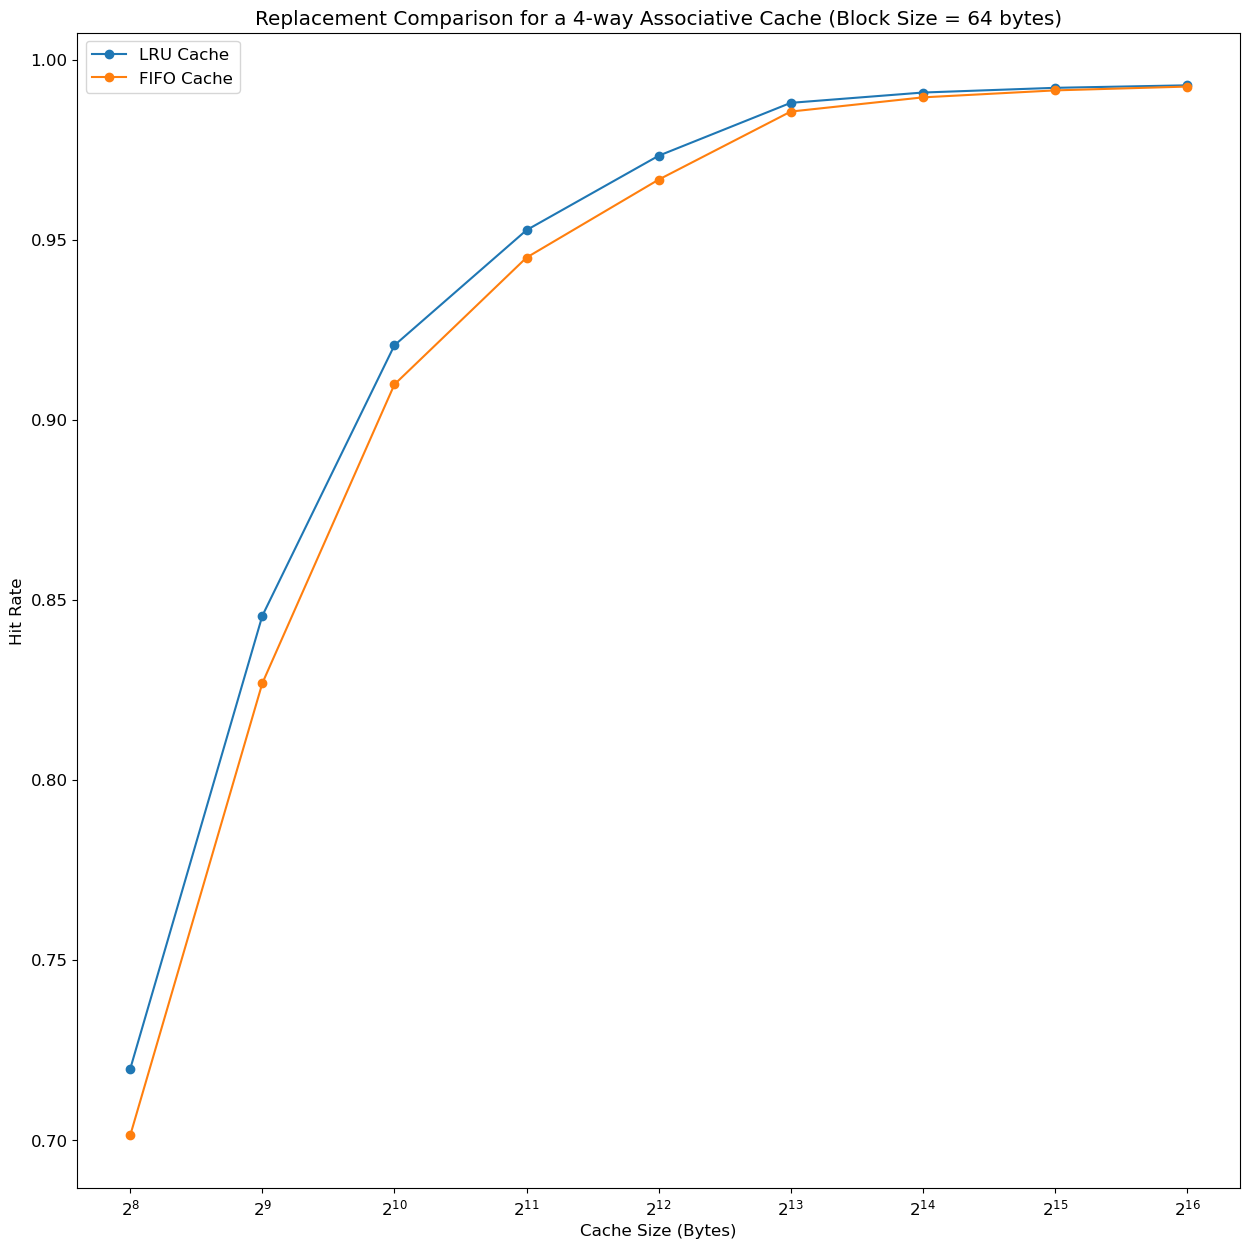

In [85]:
%matplotlib inline
plt.rc('font', size=12) #controls default text size
large_df = pd.read_csv(large_file)
commonAs = 4

#Isolate the first 10 rows from both the lru and fifo side for a bar plot.
lru_set = large_df.loc[large_df['associativity']==commonAs].loc[large_df['lru_fifo']=='lru'].loc[large_df['cache_size']<=65536]
fifo_set = large_df.loc[large_df['associativity']==commonAs].loc[large_df['lru_fifo']=='fifo'].loc[large_df['cache_size']<=65536]


plt.figure(figsize=(15,15))
x = np.arange(len(lru_set))

labels = []
for i in range(len(lru_set)):
    labels += [f'$2^{{{np.int32(np.log2(lru_set.iloc[i]["cache_size"]))}}}$']

lru_set = lru_set['hit_rate']
fifo_set = fifo_set['hit_rate']
    
plt.xticks(x, labels)
plt.plot(x, lru_set, label='LRU Cache', marker='o');
plt.plot(x, fifo_set, label='FIFO Cache', marker='o');

plt.legend();
plt.title(f'Replacement Comparison for a 4-way Associative Cache (Block Size = {blocksize} bytes)');
plt.xlabel('Cache Size (Bytes)')
plt.ylabel('Hit Rate')

### Discussion

&emsp;For the given 4-way associative cache designs in the dataset, the LRU replacement method comes out slightly ahead of FIFO most of the time. However, the difference between LRU and FIFO vanishes with higher cache sizes.

## Cache Size

### Data Analysis

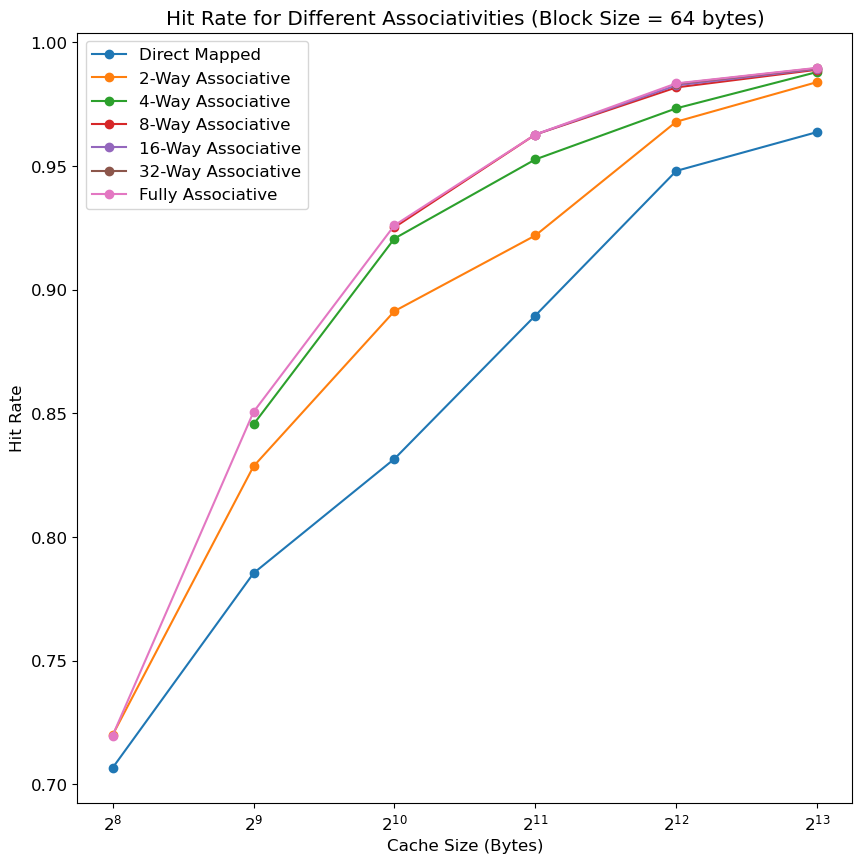

In [84]:
%matplotlib inline
largestSize = 8192
smallestSize = 256
plt.rc('font', size=12) #controls default text size
cacheSizes = [2**8, 2**9, 2**10, 2**11, 2**12, 2**13]

fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot()

values = pd.read_csv(large_file)
values = values.loc[values['lru_fifo']=='lru'].loc[values['cache_size'] <= largestSize].loc[values['cache_size'] >= smallestSize]

#Collect all direct mapped, set associative, fully associative.
directMapped = values.loc[values['associativity'] == 1]
fullyAssociative = values.loc[values['associativity'] == values['num_lines']]
set2 = values.loc[values['associativity'] == 2].loc[values['associativity'] != values['num_lines']]
set4 = values.loc[values['associativity'] == 4].loc[values['associativity'] != values['num_lines']]
set8 = values.loc[values['associativity'] == 8].loc[values['associativity'] != values['num_lines']]
set16 = values.loc[values['associativity'] == 16].loc[values['associativity'] != values['num_lines']]
set32 = values.loc[values['associativity'] == 32].loc[values['associativity'] != values['num_lines']]

ax.plot(list(directMapped['cache_size']), list(directMapped['hit_rate']), label='Direct Mapped', marker='o');
ax.plot(list(set2['cache_size']), list(set2['hit_rate']), label='2-Way Associative', marker='o');
ax.plot(list(set4['cache_size']), list(set4['hit_rate']), label='4-Way Associative', marker='o');
ax.plot(list(set8['cache_size']), list(set8['hit_rate']), label='8-Way Associative', marker='o');
ax.plot(list(set16['cache_size']), list(set16['hit_rate']), label='16-Way Associative', marker='o');
ax.plot(list(set32['cache_size']), list(set32['hit_rate']), label='32-Way Associative', marker='o');
ax.plot(list(fullyAssociative['cache_size']), list(fullyAssociative['hit_rate']), label='Fully Associative', marker='o');
ax.legend();
ax.set_xlabel('Cache Size (Bytes)')
ax.set_ylabel('Hit Rate')
ax.set_title(f'Hit Rate for Different Associativities (Block Size = {blocksize} bytes)')
ax.set_xscale('log', base=2)

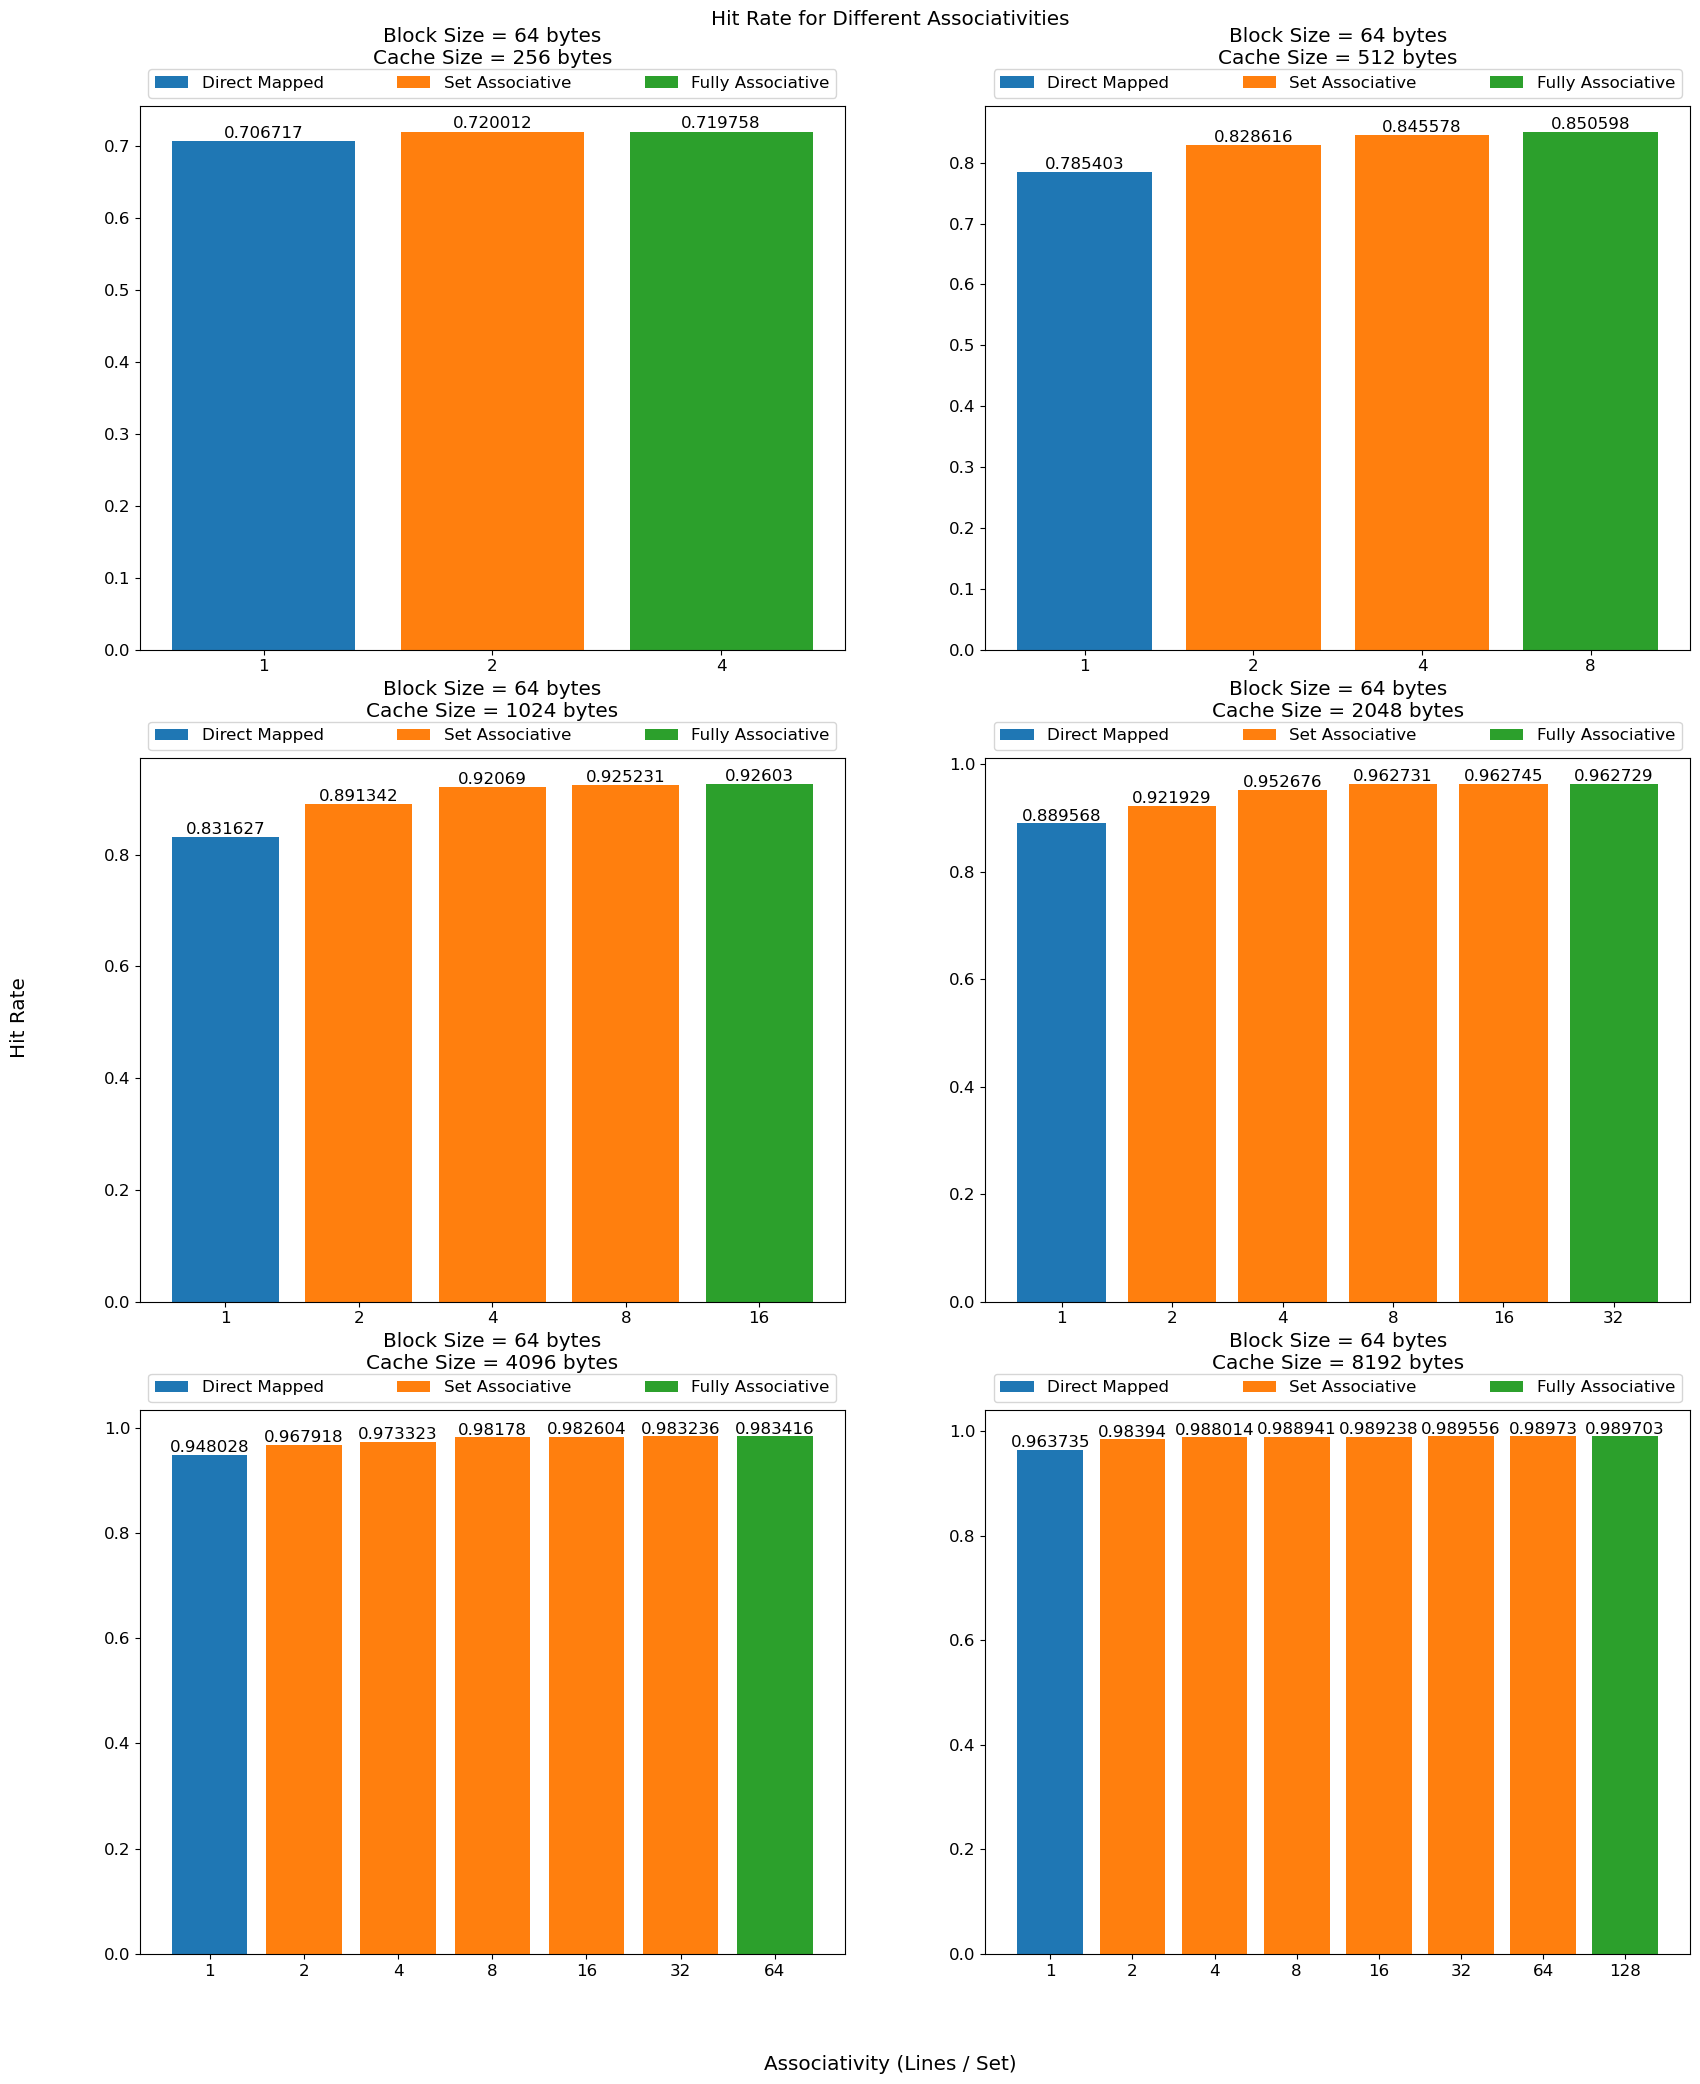

In [27]:
%matplotlib inline
plt.rc('font', size=12) #controls default text size
cacheSizes = [2**8, 2**9, 2**10, 2**11, 2**12, 2**13]

subplots = [3,2]
fig = plt.figure(figsize=(20,24));
fig.suptitle('Hit Rate for Different Associativities', y=.92)
fig.supxlabel('Associativity (Lines / Set)', y=.06)
fig.supylabel('Hit Rate', x=.06)
for en in enumerate(cacheSizes):
    cacheSize = en[1]

    values = pd.read_csv(large_file)
    values = values.loc[values['lru_fifo']=='lru'].loc[values['cache_size']==cacheSize]

    
    ax = fig.add_subplot(subplots[0], subplots[1], en[0] + 1);

    x = np.arange(len(values['associativity']))
    #Make three lists for the three different types of cache.
    directType = [0, values['hit_rate'].iloc[0]]
    fullType = [len(x) - 1, values['hit_rate'].iloc[len(x) - 1]]
    setType = [np.arange(1, len(x) - 1), values['hit_rate'].iloc[1:len(x) - 1]]

    ax.bar(directType[0], directType[1], label='Direct Mapped')
    ax.bar(setType[0], setType[1], label='Set Associative')
    ax.bar(fullType[0], fullType[1], label='Fully Associative')

    plt.xticks(x, list(values['associativity']))
    ax.set_title('Block Size = ' + f'{blocksize} bytes\nCache Size = {cacheSize} bytes', pad=30);
    ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3);
    addlabels(x, list(values['hit_rate']),y_offset=.005)

### Discussion

&emsp;The line graph and bar plots show that hit rate will increase with an increase in cache size regardless of associativity. The hit rate of all associativities increases with an increase in cache size. However, the difference in hit rate between the different associativities goes to zero as the cache size increases. Associativities' impact on hit rate is only noticable before a cache size of $2^{13}$ bytes. In this range, the graph shows that an increase in associativity results in higher hit rates, but these increases become negligable if it is higher than 4-way associativity.

&emsp;The associativities and hit rates largely follow the pattern established in the [Cache Type](#Cache-Type) section. However, cache sizes of 256 bytes, 2048 bytes, and 8192 bytes have a set associative cache narrowly beating the fully associative cache. The difference between the hit rates of these caches is, at most, $254 \times 10^{-6}$ so it could be a floating point issue.

## All Features

&emsp;This part plots all features in two separate 3D scatter plots to confirm some of the patterns discussed in class and to see if any interesting patterns emerge.

### Data Analysis

In [66]:
#Matplotlib 3d cannot currently plot log scale, so you have to do it manually.
#https://stackoverflow.com/questions/3909794/plotting-mplot3d-axes3d-xyz-surface-plot-with-log-scale
import matplotlib.ticker as mticker
def log_tick_formatter(val, pos=None):
    return f"$2^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

In [68]:
df_large = pd.read_csv(large_file)

#Isolate the primary features in the dataset.
df_large = df_large[['cache_size', 'block_size', 'associativity', 'lru_fifo', 'hit_rate']]
df_large.head()

#isolate lru and fifo data.
df_large_lru = df_large.loc[df_large['lru_fifo']=='lru']
df_large_fifo = df_large.loc[df_large['lru_fifo']=='fifo']

<IPython.core.display.Javascript object>


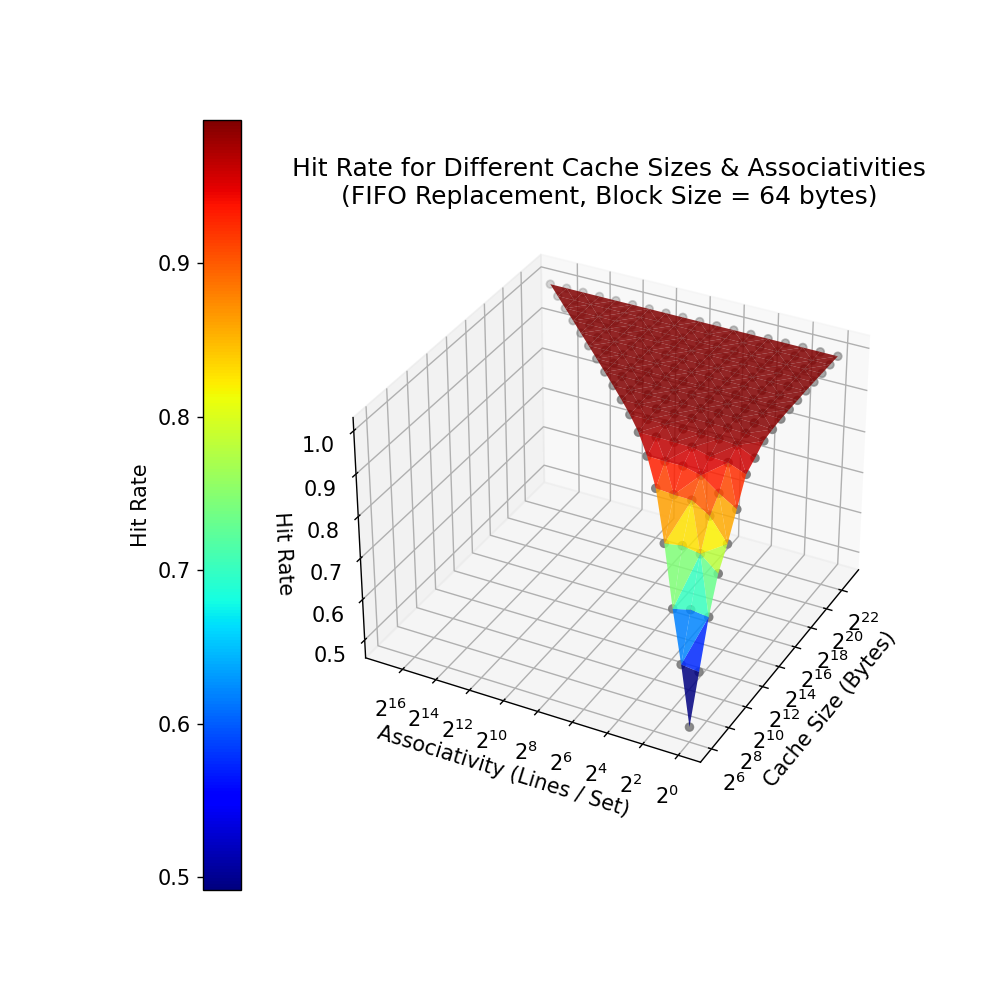

In [69]:
%matplotlib notebook
plt.rcParams['axes.grid'] = False

all_colors = np.array(df_large_fifo[['hit_rate']]).tolist()
color_map = cm.ScalarMappable(cmap=cm.jet)
color_map.set_array(all_colors)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

xs = np.log2(df_large_fifo[['cache_size']].values.tolist()).flatten()
ys = np.log2(df_large_fifo[['associativity']].values.tolist()).flatten()
zs = np.array(df_large_fifo[['hit_rate']].values.tolist()).flatten()

ax.scatter(xs, ys, zs, color='gray')
ax.plot_trisurf(xs, ys, zs, linewidth=0.2, antialiased=True, alpha=0.85, cmap=cm.jet)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.colorbar(color_map, location='left', label='Hit Rate')
ax.set_xlabel('Cache Size (Bytes)')
ax.set_ylabel('Associativity (Lines / Set)')
ax.set_zlabel('Hit Rate')
ax.set_title('Hit Rate for Different Cache Sizes & Associativities\n' 
             + f'(FIFO Replacement, Block Size = {blocksize} bytes)')

plt.show()

<IPython.core.display.Javascript object>


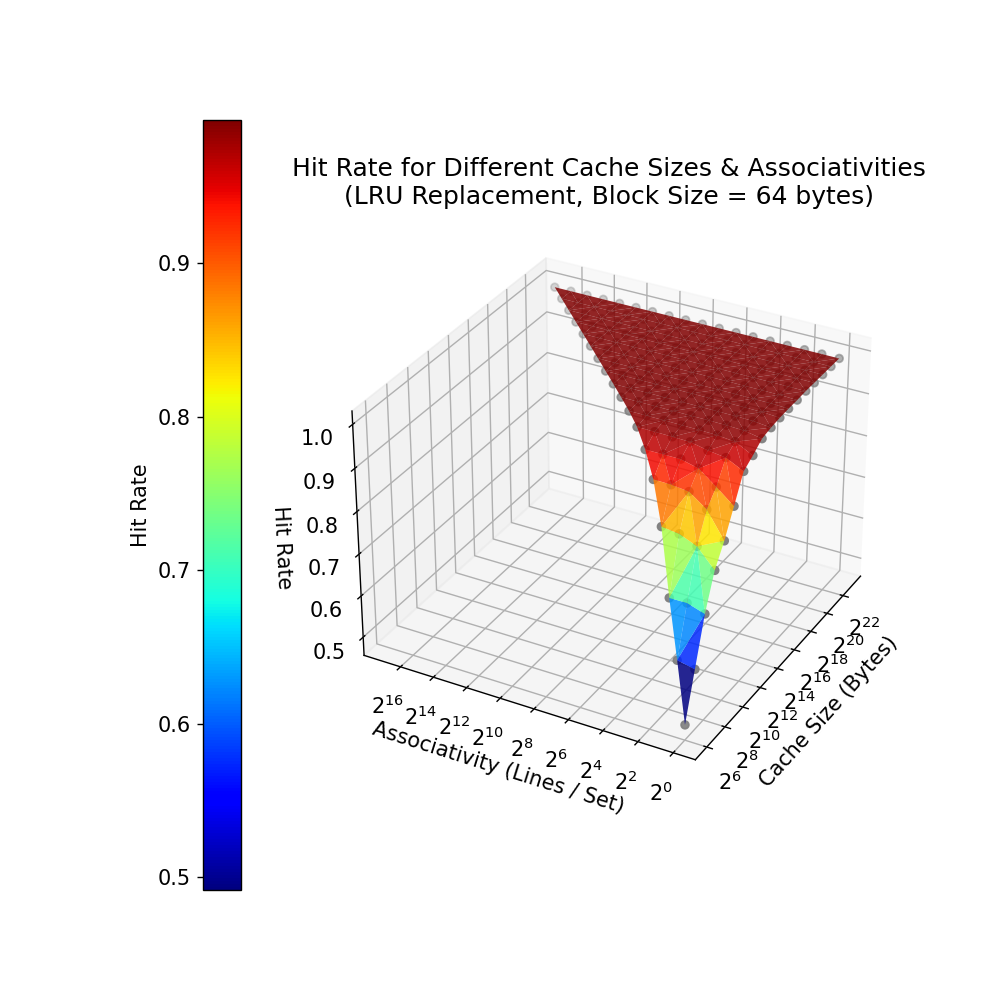

In [71]:
%matplotlib notebook
plt.rcParams['axes.grid'] = False

all_colors = np.array(df_large_lru[['hit_rate']]).tolist()
color_map = cm.ScalarMappable(cmap=cm.jet)
color_map.set_array(all_colors)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

xs = np.log2(df_large_lru[['cache_size']].values.tolist()).flatten()
ys = np.log2(df_large_lru[['associativity']].values.tolist()).flatten()
zs = np.array(df_large_lru[['hit_rate']].values.tolist()).flatten()

ax.scatter(xs, ys, zs, color='gray')

ax.plot_trisurf(xs, ys, zs, linewidth=0.2, antialiased=True, alpha=0.85, cmap=cm.jet)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.colorbar(color_map, location='left', label='Hit Rate')
ax.set_xlabel('Cache Size (Bytes)')
ax.set_ylabel('Associativity (Lines / Set)')
ax.set_zlabel('Hit Rate')
ax.set_title('Hit Rate for Different Cache Sizes & Associativities\n' + 
             f'(LRU Replacement, Block Size = {blocksize} bytes)')

plt.show()

### Discussion

&emsp;These graphs demonstrate the two methods of improving the hit rate of a cache. For a constant block size of 128 bytes you can either increase the cache size or the associativity to improve the hit rate. You might need to increase the cache size to increase the associativity, but this increase is applied at an angle to the cache size axis. This chart could be used in cache design to determine the movements needed to reach a desired hit rate. It could also be used to quickly determine the effectiveness of any cache design within these parameters without needing simulations.

&emsp;Interestingly, there does not seem to be a visible difference between the two graphs even though the difference between LRU and FIFO was mentioned in class. This discrepency could be because of a design flaw in the CacheSim program or it may just not be visible on a graph of this nature.

# Conclusion

Cache design is centered around balancing tradeoffs in cache size, associativity, and production cost. Increasing cache size will increase the hit rate of a cache and reduce the need to change the associativity. However, this leads to a large increase in cost since the designer has to increase the size of SRAM by some factor of 2. Alternatively, a designer can increase the associativity of a cache to increase the hit rate. This change may require an increase in cache size, but it offers a greater hit rate than increasing cache size alone. Replacement policies do not impact hit rate as heavily as cache size and associativity, but the LRU replacement strategy offers a marginally higer hit rate than the FIFO strategy.

# Appendix A

This information comes from the CacheSim program help command:

        -h , -help      Displays information about a command or a list of commands.
                        Structures: -h=[command] ; -h

        -setfile , -sf  Sets the trace file to use for the simulation. The trace file must have been loaded by TraceHandler.
                        If a file is not loaded at the start, place it in the traces file and restart the program.
                        Structures: -sf="[file name]"

        -lbl            Runs the simulation in line by line mode.
                        Line by line mode has a similar interface to gdb. Enter 'l' during the simulation for commands.

        -s , -silent    Runs the simulation with no CLI output.
                        This flag overrides line by line mode.

        -as             Sets the associativity for the simulation.
                        Structures: -as=4 ; -as=1,2,4,8

        -block , -bs    Sets the block size for the simulation (in bytes).
                        Structures: -bs=512 ; -bs=4,8,16,32,64,128

        -cache , -cs    Sets the cache size for the simulation (in bytes).
                        Structures: -cs=512 ; -cs=4,8,16,32,64,128

        -method , -rp   Sets the replacement strategy used for the simulation.
                        Structures: -rp=fifo ; -rp=fifo,lru

        -mb , -memory   Sets the memory bits for the simulation.
                        This is an OPTIONAL argument. The simulation runs with a default 32 bit memory.
                        Structures: -mb=32

        -e , -export    Sets the name for the data csv to export.
                        If it has the same name as another file, the data will be appended to that file.
                        Structures: -e="[file_name_no_spaces.csv]"


# Appendix B

The dataset with all columns is available in csv form inside of the data folder.

|     |   cache_size |   block_size |   associativity | lru_fifo   |   hits |   num_requests |   hit_rate |
|----:|-------------:|-------------:|----------------:|:-----------|-------:|---------------:|-----------:|
|   0 |           64 |           64 |               1 | lru        | 253640 |         515683 |   0.491853 |
|   1 |          128 |           64 |               1 | lru        | 309461 |         515683 |   0.600099 |
|   2 |          128 |           64 |               2 | lru        | 313952 |         515683 |   0.608808 |
|   3 |          256 |           64 |               1 | lru        | 364442 |         515683 |   0.706717 |
|   4 |          256 |           64 |               2 | lru        | 371298 |         515683 |   0.720012 |
|   5 |          256 |           64 |               4 | lru        | 371167 |         515683 |   0.719758 |
|   6 |          512 |           64 |               1 | lru        | 405019 |         515683 |   0.785403 |
|   7 |          512 |           64 |               2 | lru        | 427303 |         515683 |   0.828616 |
|   8 |          512 |           64 |               4 | lru        | 436050 |         515683 |   0.845578 |
|   9 |          512 |           64 |               8 | lru        | 438639 |         515683 |   0.850598 |
|  10 |         1024 |           64 |               1 | lru        | 428856 |         515683 |   0.831627 |
|  11 |         1024 |           64 |               2 | lru        | 459650 |         515683 |   0.891342 |
|  12 |         1024 |           64 |               4 | lru        | 474784 |         515683 |   0.92069  |
|  13 |         1024 |           64 |               8 | lru        | 477126 |         515683 |   0.925231 |
|  14 |         1024 |           64 |              16 | lru        | 477538 |         515683 |   0.92603  |
|  15 |         2048 |           64 |               1 | lru        | 458735 |         515683 |   0.889568 |
|  16 |         2048 |           64 |               2 | lru        | 475423 |         515683 |   0.921929 |
|  17 |         2048 |           64 |               4 | lru        | 491279 |         515683 |   0.952676 |
|  18 |         2048 |           64 |               8 | lru        | 496464 |         515683 |   0.962731 |
|  19 |         2048 |           64 |              16 | lru        | 496471 |         515683 |   0.962745 |
|  20 |         2048 |           64 |              32 | lru        | 496463 |         515683 |   0.962729 |
|  21 |         4096 |           64 |               1 | lru        | 488882 |         515683 |   0.948028 |
|  22 |         4096 |           64 |               2 | lru        | 499139 |         515683 |   0.967918 |
|  23 |         4096 |           64 |               4 | lru        | 501926 |         515683 |   0.973323 |
|  24 |         4096 |           64 |               8 | lru        | 506287 |         515683 |   0.98178  |
|  25 |         4096 |           64 |              16 | lru        | 506712 |         515683 |   0.982604 |
|  26 |         4096 |           64 |              32 | lru        | 507038 |         515683 |   0.983236 |
|  27 |         4096 |           64 |              64 | lru        | 507131 |         515683 |   0.983416 |
|  28 |         8192 |           64 |               1 | lru        | 496982 |         515683 |   0.963735 |
|  29 |         8192 |           64 |               2 | lru        | 507401 |         515683 |   0.98394  |
|  30 |         8192 |           64 |               4 | lru        | 509502 |         515683 |   0.988014 |
|  31 |         8192 |           64 |               8 | lru        | 509980 |         515683 |   0.988941 |
|  32 |         8192 |           64 |              16 | lru        | 510133 |         515683 |   0.989238 |
|  33 |         8192 |           64 |              32 | lru        | 510297 |         515683 |   0.989556 |
|  34 |         8192 |           64 |              64 | lru        | 510387 |         515683 |   0.98973  |
|  35 |         8192 |           64 |             128 | lru        | 510373 |         515683 |   0.989703 |
|  36 |        16384 |           64 |               1 | lru        | 506361 |         515683 |   0.981923 |
|  37 |        16384 |           64 |               2 | lru        | 510125 |         515683 |   0.989222 |
|  38 |        16384 |           64 |               4 | lru        | 510978 |         515683 |   0.990876 |
|  39 |        16384 |           64 |               8 | lru        | 511178 |         515683 |   0.991264 |
|  40 |        16384 |           64 |              16 | lru        | 511215 |         515683 |   0.991336 |
|  41 |        16384 |           64 |              32 | lru        | 511216 |         515683 |   0.991338 |
|  42 |        16384 |           64 |              64 | lru        | 511238 |         515683 |   0.99138  |
|  43 |        16384 |           64 |             128 | lru        | 511248 |         515683 |   0.9914   |
|  44 |        16384 |           64 |             256 | lru        | 511250 |         515683 |   0.991404 |
|  45 |        32768 |           64 |               1 | lru        | 509077 |         515683 |   0.98719  |
|  46 |        32768 |           64 |               2 | lru        | 511354 |         515683 |   0.991605 |
|  47 |        32768 |           64 |               4 | lru        | 511653 |         515683 |   0.992185 |
|  48 |        32768 |           64 |               8 | lru        | 511733 |         515683 |   0.99234  |
|  49 |        32768 |           64 |              16 | lru        | 511774 |         515683 |   0.99242  |
|  50 |        32768 |           64 |              32 | lru        | 511791 |         515683 |   0.992453 |
|  51 |        32768 |           64 |              64 | lru        | 511793 |         515683 |   0.992457 |
|  52 |        32768 |           64 |             128 | lru        | 511813 |         515683 |   0.992495 |
|  53 |        32768 |           64 |             256 | lru        | 511814 |         515683 |   0.992497 |
|  54 |        32768 |           64 |             512 | lru        | 511807 |         515683 |   0.992484 |
|  55 |        65536 |           64 |               1 | lru        | 510614 |         515683 |   0.99017  |
|  56 |        65536 |           64 |               2 | lru        | 511914 |         515683 |   0.992691 |
|  57 |        65536 |           64 |               4 | lru        | 512011 |         515683 |   0.992879 |
|  58 |        65536 |           64 |               8 | lru        | 512041 |         515683 |   0.992938 |
|  59 |        65536 |           64 |              16 | lru        | 512052 |         515683 |   0.992959 |
|  60 |        65536 |           64 |              32 | lru        | 512055 |         515683 |   0.992965 |
|  61 |        65536 |           64 |              64 | lru        | 512062 |         515683 |   0.992978 |
|  62 |        65536 |           64 |             128 | lru        | 512065 |         515683 |   0.992984 |
|  63 |        65536 |           64 |             256 | lru        | 512063 |         515683 |   0.99298  |
|  64 |        65536 |           64 |             512 | lru        | 512066 |         515683 |   0.992986 |
|  65 |        65536 |           64 |            1024 | lru        | 512067 |         515683 |   0.992988 |
|  66 |       131072 |           64 |               1 | lru        | 511304 |         515683 |   0.991508 |
|  67 |       131072 |           64 |               2 | lru        | 512116 |         515683 |   0.993083 |
|  68 |       131072 |           64 |               4 | lru        | 512187 |         515683 |   0.993221 |
|  69 |       131072 |           64 |               8 | lru        | 512200 |         515683 |   0.993246 |
|  70 |       131072 |           64 |              16 | lru        | 512199 |         515683 |   0.993244 |
|  71 |       131072 |           64 |              32 | lru        | 512209 |         515683 |   0.993263 |
|  72 |       131072 |           64 |              64 | lru        | 512212 |         515683 |   0.993269 |
|  73 |       131072 |           64 |             128 | lru        | 512206 |         515683 |   0.993257 |
|  74 |       131072 |           64 |             256 | lru        | 512206 |         515683 |   0.993257 |
|  75 |       131072 |           64 |             512 | lru        | 512211 |         515683 |   0.993267 |
|  76 |       131072 |           64 |            1024 | lru        | 512211 |         515683 |   0.993267 |
|  77 |       131072 |           64 |            2048 | lru        | 512212 |         515683 |   0.993269 |
|  78 |       262144 |           64 |               1 | lru        | 511508 |         515683 |   0.991904 |
|  79 |       262144 |           64 |               2 | lru        | 512278 |         515683 |   0.993397 |
|  80 |       262144 |           64 |               4 | lru        | 512295 |         515683 |   0.99343  |
|  81 |       262144 |           64 |               8 | lru        | 512302 |         515683 |   0.993444 |
|  82 |       262144 |           64 |              16 | lru        | 512307 |         515683 |   0.993453 |
|  83 |       262144 |           64 |              32 | lru        | 512311 |         515683 |   0.993461 |
|  84 |       262144 |           64 |              64 | lru        | 512311 |         515683 |   0.993461 |
|  85 |       262144 |           64 |             128 | lru        | 512316 |         515683 |   0.993471 |
|  86 |       262144 |           64 |             256 | lru        | 512316 |         515683 |   0.993471 |
|  87 |       262144 |           64 |             512 | lru        | 512316 |         515683 |   0.993471 |
|  88 |       262144 |           64 |            1024 | lru        | 512316 |         515683 |   0.993471 |
|  89 |       262144 |           64 |            2048 | lru        | 512316 |         515683 |   0.993471 |
|  90 |       262144 |           64 |            4096 | lru        | 512316 |         515683 |   0.993471 |
|  91 |       524288 |           64 |               1 | lru        | 512240 |         515683 |   0.993323 |
|  92 |       524288 |           64 |               2 | lru        | 512294 |         515683 |   0.993428 |
|  93 |       524288 |           64 |               4 | lru        | 512307 |         515683 |   0.993453 |
|  94 |       524288 |           64 |               8 | lru        | 512310 |         515683 |   0.993459 |
|  95 |       524288 |           64 |              16 | lru        | 512312 |         515683 |   0.993463 |
|  96 |       524288 |           64 |              32 | lru        | 512315 |         515683 |   0.993469 |
|  97 |       524288 |           64 |              64 | lru        | 512316 |         515683 |   0.993471 |
|  98 |       524288 |           64 |             128 | lru        | 512316 |         515683 |   0.993471 |
|  99 |       524288 |           64 |             256 | lru        | 512316 |         515683 |   0.993471 |
| 100 |       524288 |           64 |             512 | lru        | 512316 |         515683 |   0.993471 |
| 101 |       524288 |           64 |            1024 | lru        | 512316 |         515683 |   0.993471 |
| 102 |       524288 |           64 |            2048 | lru        | 512316 |         515683 |   0.993471 |
| 103 |       524288 |           64 |            4096 | lru        | 512316 |         515683 |   0.993471 |
| 104 |       524288 |           64 |            8192 | lru        | 512316 |         515683 |   0.993471 |
| 105 |      1048576 |           64 |               1 | lru        | 512263 |         515683 |   0.993368 |
| 106 |      1048576 |           64 |               2 | lru        | 512307 |         515683 |   0.993453 |
| 107 |      1048576 |           64 |               4 | lru        | 512310 |         515683 |   0.993459 |
| 108 |      1048576 |           64 |               8 | lru        | 512310 |         515683 |   0.993459 |
| 109 |      1048576 |           64 |              16 | lru        | 512315 |         515683 |   0.993469 |
| 110 |      1048576 |           64 |              32 | lru        | 512316 |         515683 |   0.993471 |
| 111 |      1048576 |           64 |              64 | lru        | 512316 |         515683 |   0.993471 |
| 112 |      1048576 |           64 |             128 | lru        | 512316 |         515683 |   0.993471 |
| 113 |      1048576 |           64 |             256 | lru        | 512316 |         515683 |   0.993471 |
| 114 |      1048576 |           64 |             512 | lru        | 512316 |         515683 |   0.993471 |
| 115 |      1048576 |           64 |            1024 | lru        | 512316 |         515683 |   0.993471 |
| 116 |      1048576 |           64 |            2048 | lru        | 512316 |         515683 |   0.993471 |
| 117 |      1048576 |           64 |            4096 | lru        | 512316 |         515683 |   0.993471 |
| 118 |      1048576 |           64 |            8192 | lru        | 512316 |         515683 |   0.993471 |
| 119 |      1048576 |           64 |           16384 | lru        | 512316 |         515683 |   0.993471 |
| 120 |      2097152 |           64 |               1 | lru        | 512266 |         515683 |   0.993374 |
| 121 |      2097152 |           64 |               2 | lru        | 512309 |         515683 |   0.993457 |
| 122 |      2097152 |           64 |               4 | lru        | 512311 |         515683 |   0.993461 |
| 123 |      2097152 |           64 |               8 | lru        | 512311 |         515683 |   0.993461 |
| 124 |      2097152 |           64 |              16 | lru        | 512316 |         515683 |   0.993471 |
| 125 |      2097152 |           64 |              32 | lru        | 512316 |         515683 |   0.993471 |
| 126 |      2097152 |           64 |              64 | lru        | 512316 |         515683 |   0.993471 |
| 127 |      2097152 |           64 |             128 | lru        | 512316 |         515683 |   0.993471 |
| 128 |      2097152 |           64 |             256 | lru        | 512316 |         515683 |   0.993471 |
| 129 |      2097152 |           64 |             512 | lru        | 512316 |         515683 |   0.993471 |
| 130 |      2097152 |           64 |            1024 | lru        | 512316 |         515683 |   0.993471 |
| 131 |      2097152 |           64 |            2048 | lru        | 512316 |         515683 |   0.993471 |
| 132 |      2097152 |           64 |            4096 | lru        | 512316 |         515683 |   0.993471 |
| 133 |      2097152 |           64 |            8192 | lru        | 512316 |         515683 |   0.993471 |
| 134 |      2097152 |           64 |           16384 | lru        | 512316 |         515683 |   0.993471 |
| 135 |      2097152 |           64 |           32768 | lru        | 512316 |         515683 |   0.993471 |
| 136 |      4194304 |           64 |               1 | lru        | 512269 |         515683 |   0.99338  |
| 137 |      4194304 |           64 |               2 | lru        | 512309 |         515683 |   0.993457 |
| 138 |      4194304 |           64 |               4 | lru        | 512312 |         515683 |   0.993463 |
| 139 |      4194304 |           64 |               8 | lru        | 512312 |         515683 |   0.993463 |
| 140 |      4194304 |           64 |              16 | lru        | 512316 |         515683 |   0.993471 |
| 141 |      4194304 |           64 |              32 | lru        | 512316 |         515683 |   0.993471 |
| 142 |      4194304 |           64 |              64 | lru        | 512316 |         515683 |   0.993471 |
| 143 |      4194304 |           64 |             128 | lru        | 512316 |         515683 |   0.993471 |
| 144 |      4194304 |           64 |             256 | lru        | 512316 |         515683 |   0.993471 |
| 145 |      4194304 |           64 |             512 | lru        | 512316 |         515683 |   0.993471 |
| 146 |      4194304 |           64 |            1024 | lru        | 512316 |         515683 |   0.993471 |
| 147 |      4194304 |           64 |            2048 | lru        | 512316 |         515683 |   0.993471 |
| 148 |      4194304 |           64 |            4096 | lru        | 512316 |         515683 |   0.993471 |
| 149 |      4194304 |           64 |            8192 | lru        | 512316 |         515683 |   0.993471 |
| 150 |      4194304 |           64 |           16384 | lru        | 512316 |         515683 |   0.993471 |
| 151 |      4194304 |           64 |           32768 | lru        | 512316 |         515683 |   0.993471 |
| 152 |      4194304 |           64 |           65536 | lru        | 512316 |         515683 |   0.993471 |
| 153 |      8388608 |           64 |               1 | lru        | 512271 |         515683 |   0.993384 |
| 154 |      8388608 |           64 |               2 | lru        | 512311 |         515683 |   0.993461 |
| 155 |      8388608 |           64 |               4 | lru        | 512312 |         515683 |   0.993463 |
| 156 |      8388608 |           64 |               8 | lru        | 512312 |         515683 |   0.993463 |
| 157 |      8388608 |           64 |              16 | lru        | 512316 |         515683 |   0.993471 |
| 158 |      8388608 |           64 |              32 | lru        | 512316 |         515683 |   0.993471 |
| 159 |      8388608 |           64 |              64 | lru        | 512316 |         515683 |   0.993471 |
| 160 |      8388608 |           64 |             128 | lru        | 512316 |         515683 |   0.993471 |
| 161 |      8388608 |           64 |             256 | lru        | 512316 |         515683 |   0.993471 |
| 162 |      8388608 |           64 |             512 | lru        | 512316 |         515683 |   0.993471 |
| 163 |      8388608 |           64 |            1024 | lru        | 512316 |         515683 |   0.993471 |
| 164 |      8388608 |           64 |            2048 | lru        | 512316 |         515683 |   0.993471 |
| 165 |      8388608 |           64 |            4096 | lru        | 512316 |         515683 |   0.993471 |
| 166 |      8388608 |           64 |            8192 | lru        | 512316 |         515683 |   0.993471 |
| 167 |      8388608 |           64 |           16384 | lru        | 512316 |         515683 |   0.993471 |
| 168 |      8388608 |           64 |           32768 | lru        | 512316 |         515683 |   0.993471 |
| 169 |      8388608 |           64 |           65536 | lru        | 512316 |         515683 |   0.993471 |
| 170 |      8388608 |           64 |          131072 | lru        | 512316 |         515683 |   0.993471 |
| 171 |           64 |           64 |               1 | fifo       | 253640 |         515683 |   0.491853 |
| 172 |          128 |           64 |               1 | fifo       | 309461 |         515683 |   0.600099 |
| 173 |          128 |           64 |               2 | fifo       | 312050 |         515683 |   0.60512  |
| 174 |          256 |           64 |               1 | fifo       | 364442 |         515683 |   0.706717 |
| 175 |          256 |           64 |               2 | fifo       | 367085 |         515683 |   0.711842 |
| 176 |          256 |           64 |               4 | fifo       | 361647 |         515683 |   0.701297 |
| 177 |          512 |           64 |               1 | fifo       | 405019 |         515683 |   0.785403 |
| 178 |          512 |           64 |               2 | fifo       | 422686 |         515683 |   0.819662 |
| 179 |          512 |           64 |               4 | fifo       | 426396 |         515683 |   0.826857 |
| 180 |          512 |           64 |               8 | fifo       | 422990 |         515683 |   0.820252 |
| 181 |         1024 |           64 |               1 | fifo       | 428856 |         515683 |   0.831627 |
| 182 |         1024 |           64 |               2 | fifo       | 456270 |         515683 |   0.884788 |
| 183 |         1024 |           64 |               4 | fifo       | 469181 |         515683 |   0.909824 |
| 184 |         1024 |           64 |               8 | fifo       | 469762 |         515683 |   0.910951 |
| 185 |         1024 |           64 |              16 | fifo       | 471460 |         515683 |   0.914244 |
| 186 |         2048 |           64 |               1 | fifo       | 458735 |         515683 |   0.889568 |
| 187 |         2048 |           64 |               2 | fifo       | 471814 |         515683 |   0.91493  |
| 188 |         2048 |           64 |               4 | fifo       | 487345 |         515683 |   0.945048 |
| 189 |         2048 |           64 |               8 | fifo       | 492448 |         515683 |   0.954943 |
| 190 |         2048 |           64 |              16 | fifo       | 492303 |         515683 |   0.954662 |
| 191 |         2048 |           64 |              32 | fifo       | 492761 |         515683 |   0.95555  |
| 192 |         4096 |           64 |               1 | fifo       | 488882 |         515683 |   0.948028 |
| 193 |         4096 |           64 |               2 | fifo       | 496976 |         515683 |   0.963724 |
| 194 |         4096 |           64 |               4 | fifo       | 498506 |         515683 |   0.966691 |
| 195 |         4096 |           64 |               8 | fifo       | 503768 |         515683 |   0.976895 |
| 196 |         4096 |           64 |              16 | fifo       | 503995 |         515683 |   0.977335 |
| 197 |         4096 |           64 |              32 | fifo       | 504365 |         515683 |   0.978052 |
| 198 |         4096 |           64 |              64 | fifo       | 504473 |         515683 |   0.978262 |
| 199 |         8192 |           64 |               1 | fifo       | 496982 |         515683 |   0.963735 |
| 200 |         8192 |           64 |               2 | fifo       | 506553 |         515683 |   0.982295 |
| 201 |         8192 |           64 |               4 | fifo       | 508253 |         515683 |   0.985592 |
| 202 |         8192 |           64 |               8 | fifo       | 508544 |         515683 |   0.986156 |
| 203 |         8192 |           64 |              16 | fifo       | 508732 |         515683 |   0.986521 |
| 204 |         8192 |           64 |              32 | fifo       | 508833 |         515683 |   0.986717 |
| 205 |         8192 |           64 |              64 | fifo       | 508884 |         515683 |   0.986816 |
| 206 |         8192 |           64 |             128 | fifo       | 508932 |         515683 |   0.986909 |
| 207 |        16384 |           64 |               1 | fifo       | 506361 |         515683 |   0.981923 |
| 208 |        16384 |           64 |               2 | fifo       | 509632 |         515683 |   0.988266 |
| 209 |        16384 |           64 |               4 | fifo       | 510286 |         515683 |   0.989534 |
| 210 |        16384 |           64 |               8 | fifo       | 510472 |         515683 |   0.989895 |
| 211 |        16384 |           64 |              16 | fifo       | 510549 |         515683 |   0.990044 |
| 212 |        16384 |           64 |              32 | fifo       | 510550 |         515683 |   0.990046 |
| 213 |        16384 |           64 |              64 | fifo       | 510519 |         515683 |   0.989986 |
| 214 |        16384 |           64 |             128 | fifo       | 510562 |         515683 |   0.99007  |
| 215 |        16384 |           64 |             256 | fifo       | 510570 |         515683 |   0.990085 |
| 216 |        32768 |           64 |               1 | fifo       | 509077 |         515683 |   0.98719  |
| 217 |        32768 |           64 |               2 | fifo       | 511037 |         515683 |   0.990991 |
| 218 |        32768 |           64 |               4 | fifo       | 511285 |         515683 |   0.991472 |
| 219 |        32768 |           64 |               8 | fifo       | 511358 |         515683 |   0.991613 |
| 220 |        32768 |           64 |              16 | fifo       | 511396 |         515683 |   0.991687 |
| 221 |        32768 |           64 |              32 | fifo       | 511423 |         515683 |   0.991739 |
| 222 |        32768 |           64 |              64 | fifo       | 511411 |         515683 |   0.991716 |
| 223 |        32768 |           64 |             128 | fifo       | 511412 |         515683 |   0.991718 |
| 224 |        32768 |           64 |             256 | fifo       | 511429 |         515683 |   0.991751 |
| 225 |        32768 |           64 |             512 | fifo       | 511431 |         515683 |   0.991755 |
| 226 |        65536 |           64 |               1 | fifo       | 510614 |         515683 |   0.99017  |
| 227 |        65536 |           64 |               2 | fifo       | 511752 |         515683 |   0.992377 |
| 228 |        65536 |           64 |               4 | fifo       | 511832 |         515683 |   0.992532 |
| 229 |        65536 |           64 |               8 | fifo       | 511854 |         515683 |   0.992575 |
| 230 |        65536 |           64 |              16 | fifo       | 511865 |         515683 |   0.992596 |
| 231 |        65536 |           64 |              32 | fifo       | 511879 |         515683 |   0.992623 |
| 232 |        65536 |           64 |              64 | fifo       | 511887 |         515683 |   0.992639 |
| 233 |        65536 |           64 |             128 | fifo       | 511889 |         515683 |   0.992643 |
| 234 |        65536 |           64 |             256 | fifo       | 511894 |         515683 |   0.992652 |
| 235 |        65536 |           64 |             512 | fifo       | 511889 |         515683 |   0.992643 |
| 236 |        65536 |           64 |            1024 | fifo       | 511885 |         515683 |   0.992635 |
| 237 |       131072 |           64 |               1 | fifo       | 511304 |         515683 |   0.991508 |
| 238 |       131072 |           64 |               2 | fifo       | 512025 |         515683 |   0.992907 |
| 239 |       131072 |           64 |               4 | fifo       | 512085 |         515683 |   0.993023 |
| 240 |       131072 |           64 |               8 | fifo       | 512095 |         515683 |   0.993042 |
| 241 |       131072 |           64 |              16 | fifo       | 512100 |         515683 |   0.993052 |
| 242 |       131072 |           64 |              32 | fifo       | 512112 |         515683 |   0.993075 |
| 243 |       131072 |           64 |              64 | fifo       | 512107 |         515683 |   0.993066 |
| 244 |       131072 |           64 |             128 | fifo       | 512108 |         515683 |   0.993067 |
| 245 |       131072 |           64 |             256 | fifo       | 512107 |         515683 |   0.993066 |
| 246 |       131072 |           64 |             512 | fifo       | 512101 |         515683 |   0.993054 |
| 247 |       131072 |           64 |            1024 | fifo       | 512103 |         515683 |   0.993058 |
| 248 |       131072 |           64 |            2048 | fifo       | 512104 |         515683 |   0.99306  |
| 249 |       262144 |           64 |               1 | fifo       | 511508 |         515683 |   0.991904 |
| 250 |       262144 |           64 |               2 | fifo       | 512243 |         515683 |   0.993329 |
| 251 |       262144 |           64 |               4 | fifo       | 512258 |         515683 |   0.993358 |
| 252 |       262144 |           64 |               8 | fifo       | 512294 |         515683 |   0.993428 |
| 253 |       262144 |           64 |              16 | fifo       | 512302 |         515683 |   0.993444 |
| 254 |       262144 |           64 |              32 | fifo       | 512298 |         515683 |   0.993436 |
| 255 |       262144 |           64 |              64 | fifo       | 512303 |         515683 |   0.993446 |
| 256 |       262144 |           64 |             128 | fifo       | 512315 |         515683 |   0.993469 |
| 257 |       262144 |           64 |             256 | fifo       | 512316 |         515683 |   0.993471 |
| 258 |       262144 |           64 |             512 | fifo       | 512316 |         515683 |   0.993471 |
| 259 |       262144 |           64 |            1024 | fifo       | 512316 |         515683 |   0.993471 |
| 260 |       262144 |           64 |            2048 | fifo       | 512316 |         515683 |   0.993471 |
| 261 |       262144 |           64 |            4096 | fifo       | 512316 |         515683 |   0.993471 |
| 262 |       524288 |           64 |               1 | fifo       | 512240 |         515683 |   0.993323 |
| 263 |       524288 |           64 |               2 | fifo       | 512279 |         515683 |   0.993399 |
| 264 |       524288 |           64 |               4 | fifo       | 512300 |         515683 |   0.99344  |
| 265 |       524288 |           64 |               8 | fifo       | 512307 |         515683 |   0.993453 |
| 266 |       524288 |           64 |              16 | fifo       | 512310 |         515683 |   0.993459 |
| 267 |       524288 |           64 |              32 | fifo       | 512314 |         515683 |   0.993467 |
| 268 |       524288 |           64 |              64 | fifo       | 512316 |         515683 |   0.993471 |
| 269 |       524288 |           64 |             128 | fifo       | 512316 |         515683 |   0.993471 |
| 270 |       524288 |           64 |             256 | fifo       | 512316 |         515683 |   0.993471 |
| 271 |       524288 |           64 |             512 | fifo       | 512316 |         515683 |   0.993471 |
| 272 |       524288 |           64 |            1024 | fifo       | 512316 |         515683 |   0.993471 |
| 273 |       524288 |           64 |            2048 | fifo       | 512316 |         515683 |   0.993471 |
| 274 |       524288 |           64 |            4096 | fifo       | 512316 |         515683 |   0.993471 |
| 275 |       524288 |           64 |            8192 | fifo       | 512316 |         515683 |   0.993471 |
| 276 |      1048576 |           64 |               1 | fifo       | 512263 |         515683 |   0.993368 |
| 277 |      1048576 |           64 |               2 | fifo       | 512299 |         515683 |   0.993438 |
| 278 |      1048576 |           64 |               4 | fifo       | 512305 |         515683 |   0.993449 |
| 279 |      1048576 |           64 |               8 | fifo       | 512308 |         515683 |   0.993455 |
| 280 |      1048576 |           64 |              16 | fifo       | 512311 |         515683 |   0.993461 |
| 281 |      1048576 |           64 |              32 | fifo       | 512316 |         515683 |   0.993471 |
| 282 |      1048576 |           64 |              64 | fifo       | 512316 |         515683 |   0.993471 |
| 283 |      1048576 |           64 |             128 | fifo       | 512316 |         515683 |   0.993471 |
| 284 |      1048576 |           64 |             256 | fifo       | 512316 |         515683 |   0.993471 |
| 285 |      1048576 |           64 |             512 | fifo       | 512316 |         515683 |   0.993471 |
| 286 |      1048576 |           64 |            1024 | fifo       | 512316 |         515683 |   0.993471 |
| 287 |      1048576 |           64 |            2048 | fifo       | 512316 |         515683 |   0.993471 |
| 288 |      1048576 |           64 |            4096 | fifo       | 512316 |         515683 |   0.993471 |
| 289 |      1048576 |           64 |            8192 | fifo       | 512316 |         515683 |   0.993471 |
| 290 |      1048576 |           64 |           16384 | fifo       | 512316 |         515683 |   0.993471 |
| 291 |      2097152 |           64 |               1 | fifo       | 512266 |         515683 |   0.993374 |
| 292 |      2097152 |           64 |               2 | fifo       | 512302 |         515683 |   0.993444 |
| 293 |      2097152 |           64 |               4 | fifo       | 512309 |         515683 |   0.993457 |
| 294 |      2097152 |           64 |               8 | fifo       | 512309 |         515683 |   0.993457 |
| 295 |      2097152 |           64 |              16 | fifo       | 512314 |         515683 |   0.993467 |
| 296 |      2097152 |           64 |              32 | fifo       | 512316 |         515683 |   0.993471 |
| 297 |      2097152 |           64 |              64 | fifo       | 512316 |         515683 |   0.993471 |
| 298 |      2097152 |           64 |             128 | fifo       | 512316 |         515683 |   0.993471 |
| 299 |      2097152 |           64 |             256 | fifo       | 512316 |         515683 |   0.993471 |
| 300 |      2097152 |           64 |             512 | fifo       | 512316 |         515683 |   0.993471 |
| 301 |      2097152 |           64 |            1024 | fifo       | 512316 |         515683 |   0.993471 |
| 302 |      2097152 |           64 |            2048 | fifo       | 512316 |         515683 |   0.993471 |
| 303 |      2097152 |           64 |            4096 | fifo       | 512316 |         515683 |   0.993471 |
| 304 |      2097152 |           64 |            8192 | fifo       | 512316 |         515683 |   0.993471 |
| 305 |      2097152 |           64 |           16384 | fifo       | 512316 |         515683 |   0.993471 |
| 306 |      2097152 |           64 |           32768 | fifo       | 512316 |         515683 |   0.993471 |
| 307 |      4194304 |           64 |               1 | fifo       | 512269 |         515683 |   0.99338  |
| 308 |      4194304 |           64 |               2 | fifo       | 512302 |         515683 |   0.993444 |
| 309 |      4194304 |           64 |               4 | fifo       | 512309 |         515683 |   0.993457 |
| 310 |      4194304 |           64 |               8 | fifo       | 512311 |         515683 |   0.993461 |
| 311 |      4194304 |           64 |              16 | fifo       | 512316 |         515683 |   0.993471 |
| 312 |      4194304 |           64 |              32 | fifo       | 512316 |         515683 |   0.993471 |
| 313 |      4194304 |           64 |              64 | fifo       | 512316 |         515683 |   0.993471 |
| 314 |      4194304 |           64 |             128 | fifo       | 512316 |         515683 |   0.993471 |
| 315 |      4194304 |           64 |             256 | fifo       | 512316 |         515683 |   0.993471 |
| 316 |      4194304 |           64 |             512 | fifo       | 512316 |         515683 |   0.993471 |
| 317 |      4194304 |           64 |            1024 | fifo       | 512316 |         515683 |   0.993471 |
| 318 |      4194304 |           64 |            2048 | fifo       | 512316 |         515683 |   0.993471 |
| 319 |      4194304 |           64 |            4096 | fifo       | 512316 |         515683 |   0.993471 |
| 320 |      4194304 |           64 |            8192 | fifo       | 512316 |         515683 |   0.993471 |
| 321 |      4194304 |           64 |           16384 | fifo       | 512316 |         515683 |   0.993471 |
| 322 |      4194304 |           64 |           32768 | fifo       | 512316 |         515683 |   0.993471 |
| 323 |      4194304 |           64 |           65536 | fifo       | 512316 |         515683 |   0.993471 |
| 324 |      8388608 |           64 |               1 | fifo       | 512271 |         515683 |   0.993384 |
| 325 |      8388608 |           64 |               2 | fifo       | 512306 |         515683 |   0.993451 |
| 326 |      8388608 |           64 |               4 | fifo       | 512310 |         515683 |   0.993459 |
| 327 |      8388608 |           64 |               8 | fifo       | 512311 |         515683 |   0.993461 |
| 328 |      8388608 |           64 |              16 | fifo       | 512316 |         515683 |   0.993471 |
| 329 |      8388608 |           64 |              32 | fifo       | 512316 |         515683 |   0.993471 |
| 330 |      8388608 |           64 |              64 | fifo       | 512316 |         515683 |   0.993471 |
| 331 |      8388608 |           64 |             128 | fifo       | 512316 |         515683 |   0.993471 |
| 332 |      8388608 |           64 |             256 | fifo       | 512316 |         515683 |   0.993471 |
| 333 |      8388608 |           64 |             512 | fifo       | 512316 |         515683 |   0.993471 |
| 334 |      8388608 |           64 |            1024 | fifo       | 512316 |         515683 |   0.993471 |
| 335 |      8388608 |           64 |            2048 | fifo       | 512316 |         515683 |   0.993471 |
| 336 |      8388608 |           64 |            4096 | fifo       | 512316 |         515683 |   0.993471 |
| 337 |      8388608 |           64 |            8192 | fifo       | 512316 |         515683 |   0.993471 |
| 338 |      8388608 |           64 |           16384 | fifo       | 512316 |         515683 |   0.993471 |
| 339 |      8388608 |           64 |           32768 | fifo       | 512316 |         515683 |   0.993471 |
| 340 |      8388608 |           64 |           65536 | fifo       | 512316 |         515683 |   0.993471 |
| 341 |      8388608 |           64 |          131072 | fifo       | 512316 |         515683 |   0.993471 |